In [151]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.12.1'

In [154]:
weight = 0.9
bias = 0.5

x = torch.arange(0, 1, 0.01)
y = weight * x + bias

tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900, 0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700,
        0.1800, 0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600,
        0.2700, 0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500,
        0.3600, 0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400,
        0.4500, 0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300,
        0.5400, 0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200,
        0.6300, 0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100,
        0.7200, 0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000,
        0.8100, 0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900,
        0.9000, 0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800,
        0.9900])

In [75]:
split_num = int(0.8 * len(x))

X_train, X_test = x[:split_num], x[split_num:]
Y_train, Y_test = y[:split_num], y[split_num:]

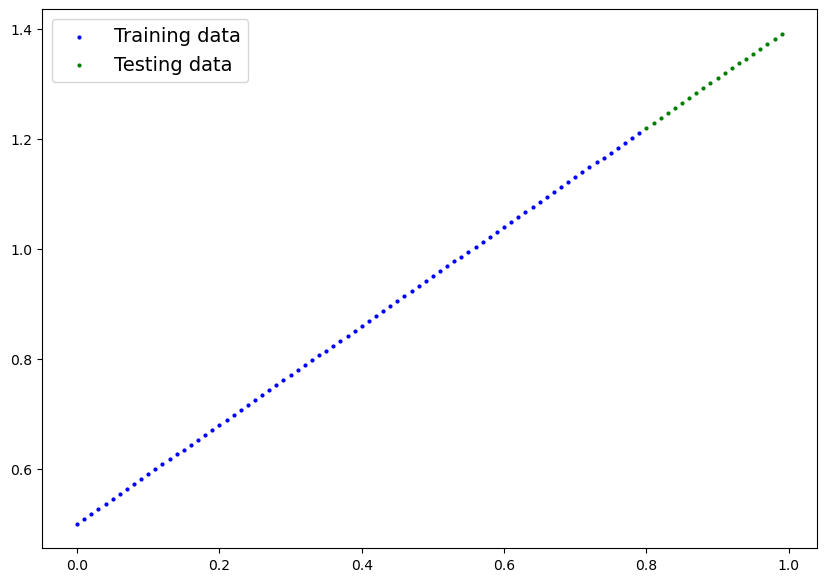

In [76]:
def plot(train_data=X_train, 
         train_labels=Y_train, 
         test_data=X_test, 
         test_labels=Y_test, 
         predictions=None):
    
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14});

plot()

In [77]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [130]:
torch.manual_seed(42)

model_0 = LinearRegression()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [131]:
# List named parameters 
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

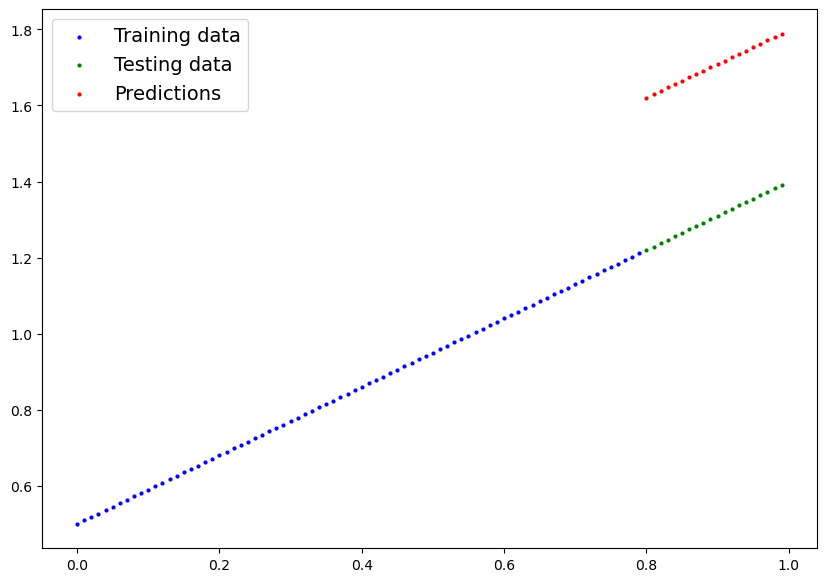

In [132]:
# Make prediction with torch inference mode

with torch.inference_mode():
    # get prediction
    y_preds = model_0(X_test)
    
    # plot predictions
    plot(predictions = y_preds)


In [133]:
# Setup loss function
loss_fn = nn.L1Loss();

# optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01,
                           )

In [134]:
# Training loop
torch.manual_seed(42)

epochs = 100

train_epochs = []
train_loss_arr = []
test_loss_arr = []

for epoch in range(epochs):
    
    model_0.train()
    
    y_pred = model_0(X_train)
    
    loss = loss_fn(y_pred, Y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_0.eval()
    
    with torch.inference_mode():
        
        y_test_pred = model_0(X_test)
        
        test_loss = loss_fn(y_test_pred, Y_test.type(torch.float))
        
        if epoch % 10 == 0 :
            train_epochs.append(epoch)
            
            train_loss_arr.append(loss.item())
            test_loss_arr.append(test_loss.item())
            
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
    

Epoch: 0 | MAE Train Loss: 0.40800032019615173 | MAE Test Loss: 0.3855997622013092 
Epoch: 10 | MAE Train Loss: 0.2923979163169861 | MAE Test Loss: 0.2502472996711731 
Epoch: 20 | MAE Train Loss: 0.17679552733898163 | MAE Test Loss: 0.11489491164684296 
Epoch: 30 | MAE Train Loss: 0.06119310110807419 | MAE Test Loss: 0.020457495003938675 
Epoch: 40 | MAE Train Loss: 0.02918996848165989 | MAE Test Loss: 0.06230713054537773 
Epoch: 50 | MAE Train Loss: 0.0255321953445673 | MAE Test Loss: 0.05847885459661484 
Epoch: 60 | MAE Train Loss: 0.022105176001787186 | MAE Test Loss: 0.05083128809928894 
Epoch: 70 | MAE Train Loss: 0.01867816410958767 | MAE Test Loss: 0.04318367689847946 
Epoch: 80 | MAE Train Loss: 0.015252122655510902 | MAE Test Loss: 0.03519211336970329 
Epoch: 90 | MAE Train Loss: 0.01182607188820839 | MAE Test Loss: 0.027200549840927124 


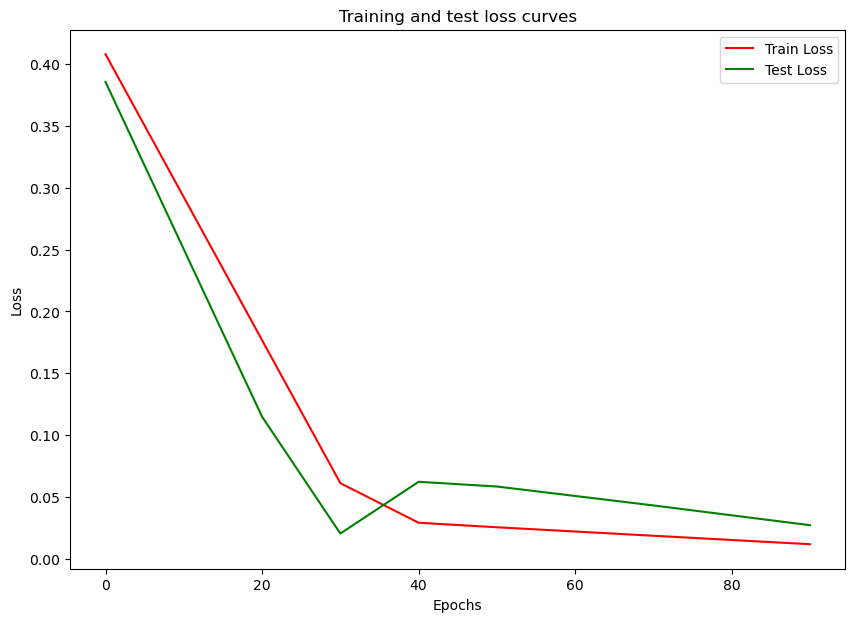

In [135]:
def plot_train_graph(x=train_epochs, y_train=train_loss_arr, y_test=test_loss_arr):
    
    plt.figure(figsize=(10, 7))
    
    plt.plot(x, y_train, color="red", label="Train Loss")
    
    # plot test loss
    plt.plot(x, y_test, color="green", label="Test Loss")
    
    plt.title("Training and test loss curves")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend();

plot_train_graph()

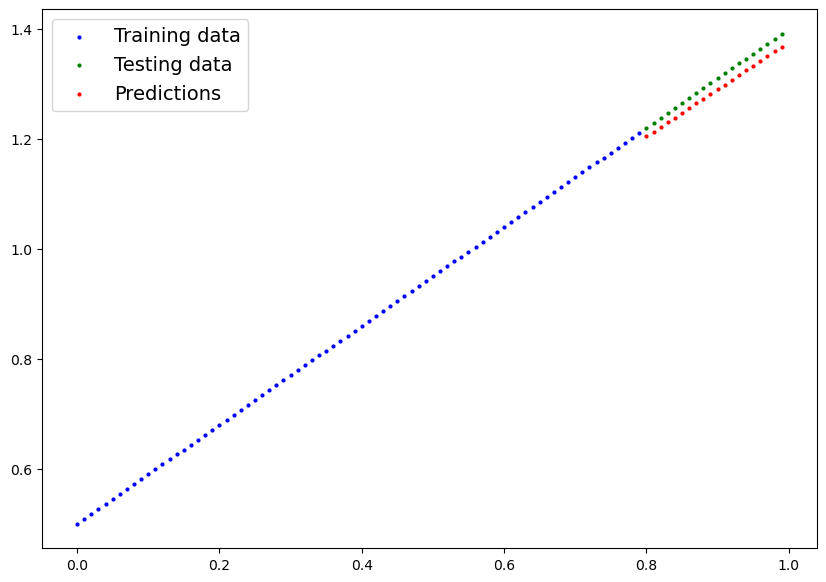

In [136]:
# Test model on test set

with torch.inference_mode():
    # get prediction
    y_preds = model_0(X_test)
    
    # plot predictions
    plot(predictions = y_preds)

In [138]:
from pathlib import Path

MODEL_PATH = Path("Models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")

# only saving the state_dict() only saves the models learned parameters
torch.save(obj=model_0.state_dict(), 
           f=MODEL_SAVE_PATH) 

Saving model to: Models/01_pytorch_workflow_model_0.pth


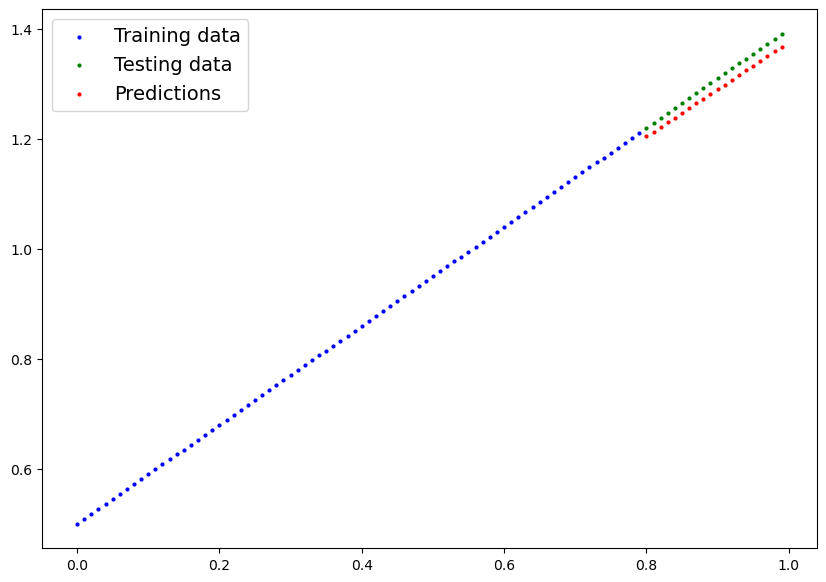

In [139]:
# Loading python model
# since we saved only paramaters we need to create a new instance of the model

MODEL_LOAD_PATH = "Models/01_pytorch_workflow_model_0.pth"

model_load_0 = LinearRegression()

model_load_0.load_state_dict(torch.load(f=MODEL_LOAD_PATH))

with torch.inference_mode():
    # get prediction
    y_preds = model_load_0(X_test)
    
    # plot predictions
    plot(predictions = y_preds)

In [149]:
import torch
from torch import nn
import matplotlib.pyplot as plt

class LinearRegressionV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn Linear for creating linear model
        self.linear_layer = nn.Linear(in_features = 1, out_features = 1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)

model_1 = LinearRegressionV2()

model_1.state_dict()
model_1.parameters()

next(model_1.parameters()).device

device(type='cpu')

In [150]:
# Send model to GPU

model_1.to(device) 
next(model_1.parameters()).device

# Put data on the available device
# Without this, error will happen (not all model/data on device)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

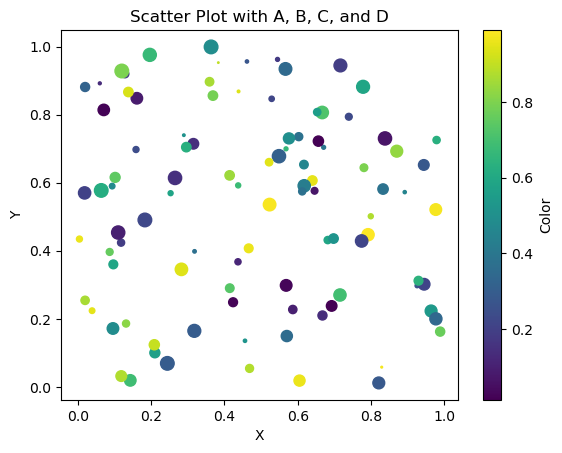

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
np.random.seed(0)
n = 100  # Number of data points
x = np.random.rand(n)  # x-coordinates
y = np.random.rand(n)  # y-coordinates
c = np.random.rand(n)  # color of scatter points
s = np.random.rand(n) * 100  # size of scatter points

# Create scatter plot
plt.scatter(x, y, c=c, s=s, cmap='viridis')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with A, B, C, and D')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Color')

# Show the plot
plt.show()

